# Plan de trabajo



<span style="color:white; background-color:blue; padding:8px;">
Preparación de datos
</span>



-Analizar los datos por medio de info() y head(). Revisar los valores nulos que hay en la data y evaluar cual sería la mejor opción para que todo quede limpio. Revisar el tipo de dato que existe en los dataframes y corregirlos, en caso de que se necesite, por ejemplo, fechas y valores numéricos.
Unir los 4 dataframes por medio de customerID, que sea lo mas sencillo y entendible posible para el modelo que se va a realizar.

<span style="color:white; background-color:blue; padding:10px;">
EDA
</span>

-Se realiza un análisis de como estan balanceados los clientes por género, ingresos, edad, que tipo de contrato es el que tienen contratado, cuantos han cancelado y cuantos hay activos hasta la fecha del reporte. Tomar en cuenta cuales son los datos que se salen (outliers) y de ser necesario y positivo para el análisis, eliminarlos. Creación de gráficos, boxplots, histográmas, para un análisis mas visual.



<span style="color:white; background-color:blue; padding:10px;">
Balance
</span>

-Analizar la proporcion de desbalance que hay entre los datos.Revisar cuales son los que estan cancelados.
Una vez revisado el desbalance, poder decidir el Oversmapling, undersampling o utilizar el class_weight. 
Esto dependerá de la cantidad de datos que se tiene y cual sea la intención del proyecto 


<span style="color:white; background-color:blue; padding:10px;">
Preparación de modelo
</span>

-Como lo que se busca es tener información sobre los usuarios y cancelaciones, es necesario que se tenga un df en donde este la variable churn como 1 y 0 (canceló o sigue activo) por medio de One-Hot Encoding o label, dependiendo de como sean los datos. 
En esta parte tambien se definirá el porcentaje de train y test para el modelamiento. 



<span style="color:white; background-color:blue; padding:10px;">
Selección de Modelo
</span>

-En esta sección se determinará cuales modelos se estaran evaluando y asi poder llegar a las metas del proyecto.
Me gustaría realizar el proyecto con Regresíon lógica, Random Forest y LightGBM.
La selección fue porque con estos modelos he estado trabajando en mis ultimos proyectos y considero que tengo las herramientas y documentación suficiente para una buena elección de modelo y asi poder tener un buen resultado.





<span style="color:white; background-color:blue; padding:10px;">
Evaluación de Modelo
</span>

-Los resultados de los modelos nos ayudaran a predecir si el cliente se va o no, pero tenemos que ser cuidadosos cuando nos da un falso positivo u otro error( decir que se va cuando se queda o no detectar correctamente quien se va).
En esta parte del proyecto se mostraran los valores que necesitamos para decidir y dar gran parte de las conclusiones, los cuales son ROC-AUC, accuracy, F1 SCORE, recall, precision. 
Retomando un poco el falso positivo, considero también necesario utilizar una Matriz de confusión para saber si el modelo esta fallando al revisar los resultados.
Es importante también tomar en cuenta que queremos el mejor desempeño del modelo, por lo cual un K-fold podría ser muy bueno, al revisar el modelo varias veces y repetirlo las veces que se consideren.
La optimización de parámetros nos ayudará tambien a crear un mejor modelo, en donde distintas técnicas nos pueden ayudar a encontrar mejores valores (Grid, Randomized)



<span style="color:white; background-color:blue; padding:8px;">
Interpretaciones
</span>


-Para interpretar los resultados, habrá que saber cuales fueron de las variables que influyeron más para saber si el cliente se va, por ejemplo saber si el tener o no internet, el tipo de contrato que se tenia, la edad, etc. Además, podremos saber los resultados de los modelos, y saber cuales cuentan con los indicadores que se necesitan para evaluarlo como buen modelo.



<span style="color:white; background-color:blue; padding:8px;">
Conculsiones
</span>

-Finalmente me gustaría concluir con cuales son los clientes que potencialmente estarían cancelando el servicio, y cuales son los factores que lo llevan a esa decisión. Cuales son los patrones similares entre los que desertan para poder ofrecer las promociones necesarias y evitar la fuga de clientes. Inclusive se podría tambien dar más recomendaciones de que edad podría ser siguiente mercado target y como se pudieran generar nuevas estrategias de venta. Todo dependerá de los resultados. 



<span style="color:white; background-color:fuchsia; padding:8px;">
Preparación de datos
</span>


In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score
from sklearn.model_selection import GridSearchCV, train_test_split





<span style="font-size:12px; font-weight:bold;">
Datos de contract
</span>


In [24]:
import pandas as pd
contract = pd.read_csv('/datasets/final_provider/contract.csv')
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [25]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


<span style="color:red; background-color:pink; padding:5px;">
Correciones
</span>

In [26]:
#Cambiar total Chardes a Numeric
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors='coerce')


In [27]:
#En Total Charges hay 11 valores nulos. Los cuales recomiendo eliminar, 
#ya que no se considera un numero significativo en los 7,043 datos que tenemos
contract = contract.dropna(subset=['TotalCharges'])

In [28]:
#Convertir las fechas a date time
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'], errors='coerce')
contract['EndDate'] = pd.to_datetime(contract['EndDate'], errors='coerce')

<span style="font-size:12px; font-weight:bold;">
Datos de Internet
</span>

In [29]:
internet= pd.read_csv('/datasets/final_provider/internet.csv')
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [30]:
internet_columns = internet.columns.tolist()
print(internet_columns)

['customerID', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']


In [31]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


<span style="font-size:12px; font-weight:bold;">
Datos de Phone
</span>

In [32]:
phone= pd.read_csv('/datasets/final_provider/phone.csv')
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [33]:
phone_columns = phone.columns.tolist()
print(phone_columns)

['customerID', 'MultipleLines']


In [34]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


<span style="font-size:12px; font-weight:bold;">
Datos de Personal
</span>

In [35]:
personal= pd.read_csv('/datasets/final_provider/personal.csv')
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [36]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


<span style="color:red; background-color:pink; padding:5px;">
Unir los 4 datra frames
</span>

In [37]:

df_merged = contract.merge(personal, on='customerID', how='left') \
                    .merge(internet, on='customerID', how='left') \
                    .merge(phone, on='customerID', how='left')


df_merged.head()


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


<span style="color:white; background-color:fuchsia; padding:8px;">
EDA
</span>


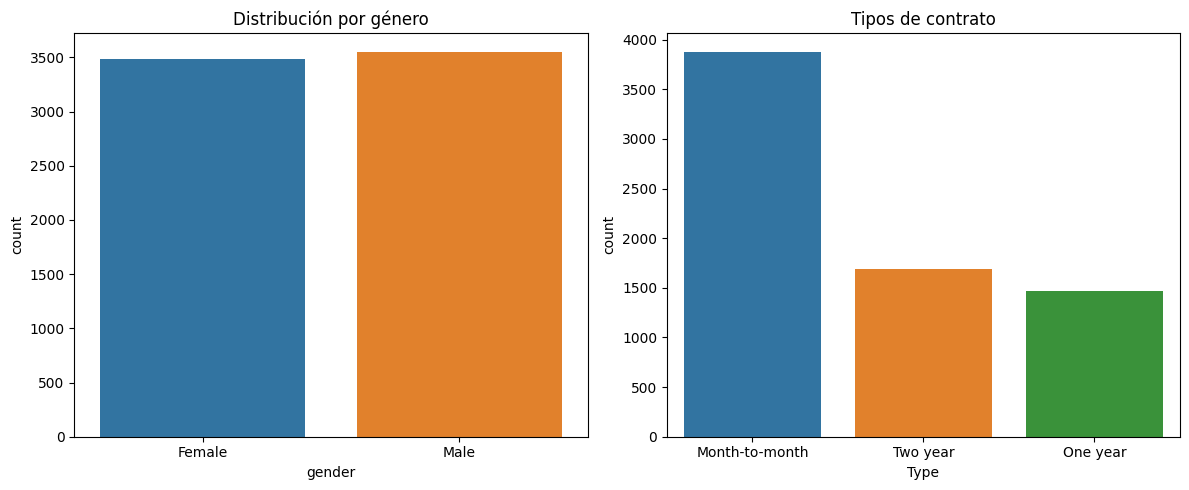

In [38]:


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))


sns.countplot(data=df_merged, x='gender', ax=ax1)
ax1.set_title('Distribución por género')


sns.countplot(data=df_merged, x='Type', order=df_merged['Type'].value_counts().index, ax=ax2)
ax2.set_title('Tipos de contrato')

plt.tight_layout()
plt.show()





Podemos osbervar tambien que la distribución por genero es relativamente poca, ya que estan muy a la par. Lo cual nos indica que el género no es un factor determinante.
En los tipos de contrato, el tipo de contrato mas utilizado por los clientes es el de mes a mes, ganando por mas del doble a los otros contratos. Despues le sigue el contrato de 2 años, y por último el de 1 año. Lo cual nos hace pensar que los clientes prefieren atarse a la empresa 2 años a que solo 1 año. Probablemente brinde mas beneficios el de 2 años, por ejemplo, los descuentos.

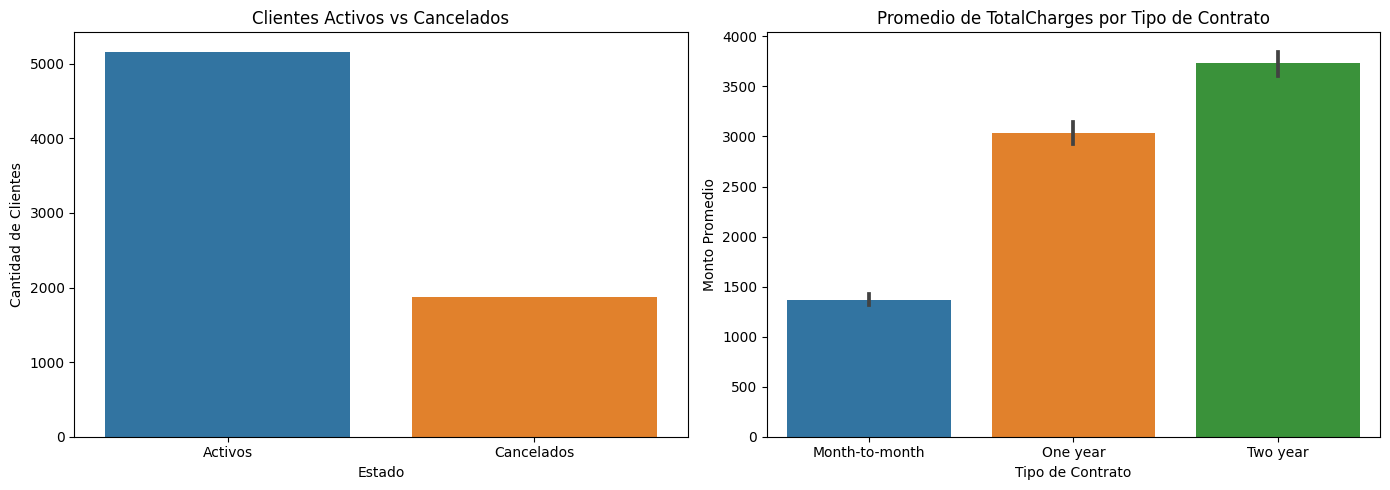

In [39]:
activos = df_merged['EndDate'].isna().sum()
cancelados = df_merged['EndDate'].notna().sum()


estado_df = pd.DataFrame({
    'Estado': ['Activos', 'Cancelados'],
    'Cantidad': [activos, cancelados]
})




fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))


sns.barplot(data=estado_df, x='Estado', y='Cantidad', ax=ax1)
ax1.set_title('Clientes Activos vs Cancelados')
ax1.set_ylabel('Cantidad de Clientes')

#Promedio de TotalCharges por tipo de contrato
sns.barplot(data=df_merged, x='Type', y='TotalCharges', estimator=np.mean, ax=ax2)
ax2.set_title('Promedio de TotalCharges por Tipo de Contrato')
ax2.set_ylabel('Monto Promedio')
ax2.set_xlabel('Tipo de Contrato')

plt.tight_layout()
plt.show()





La primera tabla nos muestra que tantos usuarios actualmente estan activos y cancelados. Por el doble, son mas los activos que los cancelados. De esos mas de 5,000 usuarios, necesitamos saber cuales son los potencialmente en irse. Y también podriamos investigar porque cancelaron losque ya estan fuera, y si se pudiera hacer un re-contrato con mas facilidades. 
La segunda tabla es muy interesante, ya que nos muestra por contrato cual es el monto promedio de total charges. Nos muestra que el contrato Two Year tiene el promedio mas alto, que poco arriba de 3,500. 

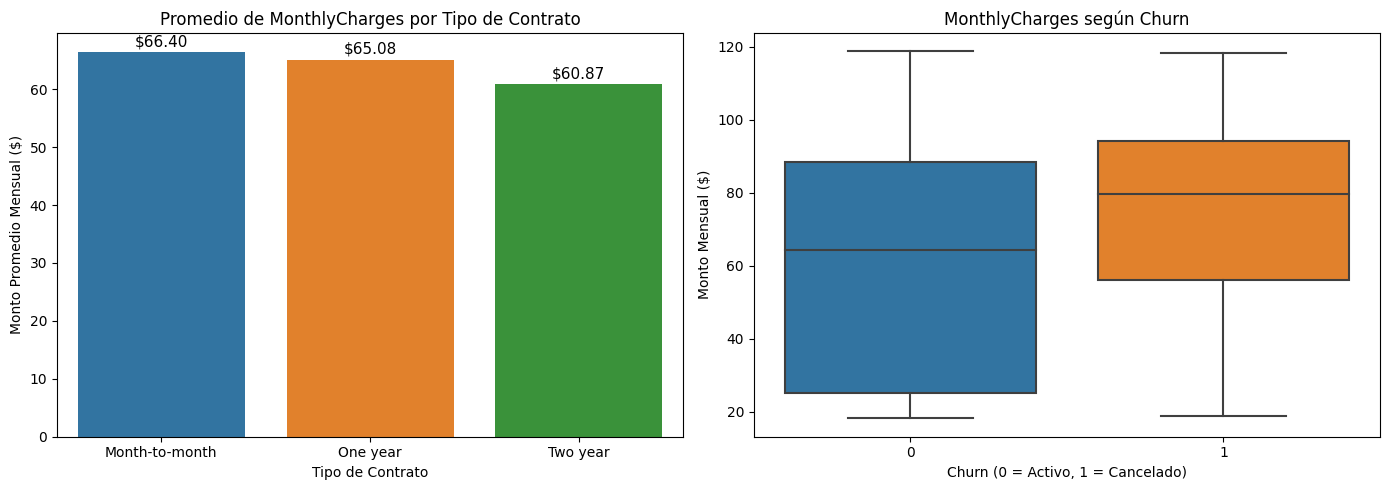

In [40]:

monthly_avg = df_merged.groupby('Type')['MonthlyCharges'].mean().round(2)
monthly_avg_df = monthly_avg.reset_index()
monthly_avg_df.columns = ['Tipo de Contrato', 'MonthlyCharges Promedio']


df_merged['Churn'] = df_merged['EndDate'].notna().astype(int)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Promedio de MonthlyCharges por tipo de contrato
sns.barplot(data=monthly_avg_df, x='Tipo de Contrato', y='MonthlyCharges Promedio', ax=ax1)
ax1.set_title('Promedio de MonthlyCharges por Tipo de Contrato')
ax1.set_ylabel('Monto Promedio Mensual ($)')
ax1.set_xlabel('Tipo de Contrato')


for i, val in enumerate(monthly_avg_df['MonthlyCharges Promedio']):
    ax1.text(i, val + 0.5, f'${val:.2f}', ha='center', va='bottom', fontsize=11)

# MonthlyCharges vs Churn
sns.boxplot(data=df_merged, x='Churn', y='MonthlyCharges', ax=ax2)
ax2.set_title('MonthlyCharges según Churn')
ax2.set_xlabel('Churn (0 = Activo, 1 = Cancelado)')
ax2.set_ylabel('Monto Mensual ($)')

plt.tight_layout()
plt.show()


Para la primera tabla, podemos deducir que el promedio mensual de pago mas alto es el de Mes a Mes, dejando por segundo al contrato de un año, y por último al Two year. Anteriormente habiamos visto que el mas utilizado es el contrato mes a mes y aqui vemos que es el que tiene mas cargos al mes, una posible razón para esto podría ser que no los obliga a atarse a la compañía pero les cobra más caro. Y asi tambíen aplicaría a porqué los total charges mensuales (tabla de gráficos anterior) son más altos para el Two Year contract, es simplemente por los meses, no porque realmente se deba más.
Para la gráfica de boxplot, estoy evaluando si tiene relevancia que los pagos al mes tengan que ver con cancelar el servicio. (o= activo, 1= cancelado). Clientes que cancelaron el contrato, tuvieron cargos mensuales mas altos en comparación a los que estan activos.
Algo importante para recalcar es la mediana que es mmayor en el grupo de cancelados (Teniendo Outliers más altos). Esta gráfica nos puede dar cierta idea de que los cluentes con planes mensuales mas costosos pueden ser mas propensos a abandonar el servicio. 

<span style="color:white; background-color:fuchsia; padding:8px;">
Balanceo
</span>


In [41]:



X = df_merged.select_dtypes(include=['int64', 'float64']).drop(columns=['Churn'])
y = df_merged['Churn']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


X_train.shape, X_test.shape, y_train.value_counts(), y_test.value_counts()



((5625, 3),
 (1407, 3),
 0    4130
 1    1495
 Name: Churn, dtype: int64,
 0    1033
 1     374
 Name: Churn, dtype: int64)

Para el balanceo estamos utilizando SMOTE. Ya que tenemos muchos mas valores activos que cancelados. Para el entrenamiento, para train estamos tomando en cuenta 5,625 muestras con 3 columenas de variables de predicción. Para la prueba estamos tomando 1,407 muestras con 3 variables de predicción. Dando un balanceo de 1033 activos y 374 cancelados. 

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Paola realmente no estás aplicando SMOTE como técnica de balanceo, como te puedes dar cuenta al momento de contar los valores de `y` el desbalanceo aún existe. 

No obstante, más adelante implementas otras técnicas de balanceo, por lo que logras cumplir el objetivo del proyecto. Pero debes tener cuidado con este tipo de detalles, con el fin de que tu trabajo sea consistente

</div>

<span style="color:white; background-color:fuchsia; padding:8px;">
Preparación de Modelo 
</span>



<span style="color:red; background-color:pink; padding:5px;">
Random Forest Classifier
</span>

In [42]:

param_grid = {
    'n_estimators': [100, 200,300],
    'max_depth': [10,20,None],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4],
    'class_weight': ['balanced']
}


rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=1
)


grid_search.fit(X_train, y_train)


best_rf_model = grid_search.best_estimator_


y_pred_best = best_rf_model.predict(X_test)
y_proba_best = best_rf_model.predict_proba(X_test)[:, 1]



precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred_best)
auc = roc_auc_score(y_test, y_proba_best)


metrics_df_best_rf = pd.DataFrame({
    'Clase': ['Activo (0)', 'Cancelado (1)'],
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Support': support,
    'AUC-ROC': [auc, auc]
})

metrics_df_best_rf




Fitting 3 folds for each of 81 candidates, totalling 243 fits


,Clase,Precision,Recall,F1-Score,Support,AUC-ROC
0,Activo (0),0.869281,0.772507,0.818042,1033,0.81454
1,Cancelado (1),0.519427,0.679144,0.588644,374,0.81454


<span style="color:red; background-color:pink; padding:5px;">
LightGBM</span>

In [45]:


best_lgb = lgb.LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=10,
    num_leaves=31,
    min_child_samples=20,
    scale_pos_weight=y_train.value_counts()[0] / y_train.value_counts()[1],
    random_state=42
)


best_lgb.fit(X_train, y_train)


y_pred = best_lgb.predict(X_test)
y_proba = best_lgb.predict_proba(X_test)[:, 1]


precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)


metrics_df_lgb_spw = pd.DataFrame({
    'Clase': ['Activo (0)', 'Cancelado (1)'],
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Support': support,
    'AUC-ROC': [auc, auc]
})

metrics_df_lgb_spw



,Clase,Precision,Recall,F1-Score,Support,AUC-ROC
0,Activo (0),0.893836,0.757986,0.820325,1033,0.826151
1,Cancelado (1),0.529190,0.751337,0.620994,374,0.826151


<span style="color:red; background-color:pink; padding:5px;">
Logistic Regression</span>

In [46]:



log_model_cv = LogisticRegressionCV(
    Cs=10,
    cv=5,
    scoring='roc_auc',
    class_weight='balanced',
    max_iter=2000,
    solver='liblinear',
    random_state=42
)

log_model_cv.fit(X_train_scaled, y_train)


y_pred_cv = log_model_cv.predict(X_test_scaled)
y_proba_cv = log_model_cv.predict_proba(X_test_scaled)[:, 1]


precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred_cv)
auc = roc_auc_score(y_test, y_proba_cv)


metrics_df_log_cv = pd.DataFrame({
    'Clase': ['Activo (0)', 'Cancelado (1)'],
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Support': support,
    'AUC-ROC': [auc, auc]
})

metrics_df_log_cv



NameError: name 'LogisticRegressionCV' is not defined

<span style="color:red; background-color:pink; padding:5px;">
Factores de Decisión</span>

In [47]:



scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

best_lgb = lgb.LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=10,
    num_leaves=31,
    min_child_samples=20,
    scale_pos_weight=scale_pos_weight,
    random_state=42
)


best_lgb.fit(X_train, y_train)


feature_importances = best_lgb.feature_importances_
feature_names = X_train.columns


importancia_df = pd.DataFrame({
    'Variable': feature_names,
    'Importancia': feature_importances
}).sort_values(by='Importancia', ascending=False)

importancia_df.head(10)




,Variable,Importancia
1,TotalCharges,3066
0,MonthlyCharges,2866
9,gender_Male,294
7,PaymentMethod_Electronic check,219
5,PaperlessBilling_Yes,219
14,OnlineBackup_Yes,199
11,Dependents_Yes,188
10,Partner_Yes,187
16,TechSupport_Yes,175
3,Type_One year,173


In [48]:

y_proba_lgb = best_lgb.predict_proba(X_test)[:, 1]


clientes_potenciales = X_test.copy()
clientes_potenciales['Churn_Probabilidad'] = y_proba_lgb
clientes_potenciales['Real_Churn'] = y_test.values 

top_10 = clientes_potenciales.sort_values(by='Churn_Probabilidad', ascending=False).head(10)

top_10


,MonthlyCharges,TotalCharges,SeniorCitizen,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,...,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,MultipleLines_Yes,Churn_Probabilidad,Real_Churn
2626,99.25,665.45,1,0,0,1,0,1,0,1,...,1,0,0,1,0,1,1,1,0.982556,1
807,69.55,69.55,0,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0.976657,1
3676,69.10,69.10,0,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0.976657,1
1726,69.60,69.60,1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0.975796,1
1802,76.35,76.35,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0.975150,1
2459,77.15,77.15,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0.974863,1
3899,78.80,78.80,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0.974240,1
2602,69.75,69.75,1,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0.973711,1
3721,96.60,291.90,0,0,0,1,0,1,0,0,...,1,0,0,0,0,1,1,1,0.970455,1
5697,75.70,75.70,0,0,0,1,0,1,0,0,...,1,0,1,0,0,0,0,0,0.970185,1


<span style="color:white; background-color:fuchsia; padding:8px;">
Interpretación
</span>

Para la decisión de modelos, contemplo que la mejor opcion es LightGBM, ya que ofrece el mayor Auc de .82, con un recall de clientes que cancellan de 75%. Tiene un buen balance y precisión a comparación de los otros modelos. El modelo de Regresión Logística es también bueno, pero el recall es menor a un 71%. Despues de haber elegido el LightGBM, obtenemos los factores de mayor relevancia para la toma de decisiones de irse o quedarse. Lo que nos indica la tabla es que los clientes con mas cargos, tienden a quedarse más, probablemente es porque ya tienen bastante tiempo con la compañía ( fidelidad). Los cargos mensuales mas altos puede ser que no convenga cancelar por el riesgo.
Antes lo habiamos mencionado el tema del género, pero apararentemente los hombres tienden a cancelar menos. El método de pago se asocia con mayor churn, posiblemente el proceso no es confiable para los clientes. Para los dependientes y los que tienen pareja, puede ser más complejo dejar el contrato para tener estabilidad en sus comunicaciones. Tener un buen servicio de tech, es un gran factor para evitar cancelaciones. Y por úlitmo como ya se habia mencionado antes, el tipo de contrato es muy importante, en este gráfico dice que es el que reduce cancelación comparado a mes a mes.


<span style="color:white; background-color:fuchsia; padding:8px;">
Conclusiones
</span>

Despues de haber entrenado y puesto a prueba los modelos, podemos concluir que los patrones comunes entre los clientes que desertan son:
-Prefieren los contratos más flexibles, sin ataduras ni penalizaciones, no les gusta quedarse atados a una empresa, sin importar que eso les esta costando más caro. Los métodos de pago, van a preferir los más seguros.
Como recomendación, se podría incentivar al cliente potencial en irse a darle una promoción de activar el contrato de 2 años, cambiar los métodos de pago a algo mas eficiente, tal vez pagos por internet con tarjeta de crédito o débito. Los usuarios a quienes tengan cargos altos, darles un tipo de plan de pagos, o descuentos personalizados para que no tengan problemas en pagar sus mensualidades.

<span style="color:white; background-color:fuchsia; padding:8px;">
Informe de Solución 
</span>

Para la resolución de este ejercicio, se realizaron 8 pasos importantes. 8 pasos los cuales fueron de gran ayuda para entender paso a paso lo que se necesitaba. Sobre todo porque habia ocaciones en las que necesitaba regresarme a los pasos anteriores para arreglar algun tipo de dato, o revisar que todo haya estado bien estructurado desde el inicio, o que las librerías hayan sido correctamente corridas.
Considero que no omití ningun paso importante, probablemente lo que no incluí fue el antes y el despues de los modelos, ya que de inicio los modelos daban un AUC-ROC mucho menor al que se muestra al final. Le fuí haciendo modificaciones en los parámetros, agregando métodos para que sea mas exacto el modelo, pero eso fué lo que no incluí. Siento que el proyecto se hubiera visto muy saturado, por eso decidí dejar solo la parte final de los modelos. 
Me encontré con dificultades de dos tipos. La primera era (y creo que muy obvia) ¿Cómo voy a llegar a esa respuesta? ¿Qué es lo que realmente se necesita hacer para obtener el resultado final? De hecho tuve que preguntar en Discord, cual era realmente el objetivo. Cuando ya lo tuve más claro, me dispuse a empezar con los 8 pasos anteriormente mencionados. La segunda dificultad fueron las gráficas (Según yo era donde tenía más expertiz, pero resultó que no). Al momento de realizarlas, me puse a pensar como sería la mejor manera de mezclar datos para sacar la información necesaria. Realicé unas tablas que eran muy buenas, con información muy interesante, pero no tenian relevancia con el ejercicio. Si tuve que encarrilarme más a lo solicitado. 
Los pasos claves para llegar al resultado, yo considero que fué entender el objetivo del proyecto y (más técnico), haber modificado los parámetros de los modelos. Que de hecho no aumentaron mucho, pero si lo hicieron. A mi lo que me interesaba era llegar lo mas cercano a .88 pero solo se pudo llegar a .82, que tampoco esta tan mal. El modelo final escogido fue LightGMB, y considero que es de gran calidad con los siguientes resultados:

In [49]:
metrics_df_lgb_spw

,Clase,Precision,Recall,F1-Score,Support,AUC-ROC
0,Activo (0),0.893836,0.757986,0.820325,1033,0.826151
1,Cancelado (1),0.529190,0.751337,0.620994,374,0.826151


El modelo funciona correctamente, el modelo sabe distringuir bien entre los cluentes que can a cancelar ylos que no. El recall de 75% significa que 3 de cada 4 clientes son detectados para poder actuar sobre ellos y que no se vayan. La precisión de 52%, pues realmente es la mitad, 5 lo hacen. De los 3 modelos considero que fue la mejor opción y me quedo satisfecha con mis resultados. 